# Modeling - selection of the best models with grid search optimization

#### Importing nessesary libraries:

In [1]:
import functions
import pandas as pd
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost.sklearn import XGBClassifier
import warnings
from sklearn.exceptions import UndefinedMetricWarning, ConvergenceWarning
warnings.filterwarnings(action='ignore', category=UndefinedMetricWarning)
warnings.filterwarnings(action='ignore', category=ConvergenceWarning)
warnings.simplefilter('ignore', FutureWarning)

#### Loading sets:

In [2]:
data_scaled = pd.read_csv(r'./data/data_scaled.csv', delimiter = ';')

#### Split dataset into train and test subsets:

In [3]:
y = data_scaled['y']
X_scaled = data_scaled.drop(['y'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.2, random_state = 100, stratify = y)

#### Resampling Techniques - oversampling minority class

In [4]:
X_train, y_train = functions.upsample(X_train, y_train)

# Examinig baseline models with grid search optimization

In [5]:
results_wgs = {}

##### LogisticRegression (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.35      0.61      0.45       928

    accuracy                           0.83      8236
   macro avg       0.65      0.73      0.67      8236
weighted avg       0.88      0.83      0.85      8236

Confusion Matrix:
AUC: 0.47
MAE: 0.17
LogisticRegression(C=0.2, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)


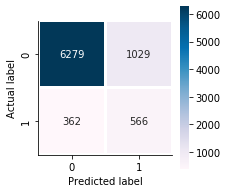

In [6]:
model_to_gs = LogisticRegression(solver='liblinear')
params = {
    "C":[0.1 ,0.15, 0.2],
    "penalty":["l1","l2"],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, cv=3, n_jobs=4)
gscv.fit(X_train, y_train)
means = gscv.cv_results_
best_model = gscv.best_estimator_
model_LR_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_LR_wgs)))

##### Decision Tree Classifier (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.93      0.84      0.89      7308
           1       0.29      0.50      0.37       928

    accuracy                           0.81      8236
   macro avg       0.61      0.67      0.63      8236
weighted avg       0.86      0.81      0.83      8236

Confusion Matrix:
AUC: 0.35
MAE: 0.19
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=15, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')


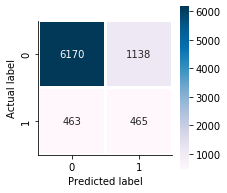

In [7]:
model_to_gs = DecisionTreeClassifier()
params = {
    "criterion": ["gini","entropy"],
    "min_samples_leaf": [1, 3 ,5],  
    "max_depth": [11 , 13, 15],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, cv=3, n_jobs=4)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_DTC_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_DTC_wgs)))

##### Random Forest Classifier (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.95      0.88      0.91      7308
           1       0.38      0.60      0.47       928

    accuracy                           0.85      8236
   macro avg       0.66      0.74      0.69      8236
weighted avg       0.88      0.85      0.86      8236

Confusion Matrix:
AUC: 0.48
MAE: 0.15
RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


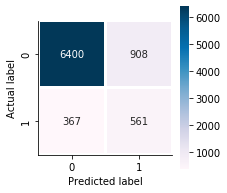

In [8]:
model_to_gs = RandomForestClassifier()
params = {
    "criterion": ["gini","entropy"],
    "min_samples_leaf": [5 ,10, 15],
    "max_depth": [5 , 7 , 9],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, cv=3, n_jobs=4)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_RFC_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_RFC_wgs)))

##### SVM (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7308
           1       0.38      0.59      0.46       928

    accuracy                           0.85      8236
   macro avg       0.66      0.73      0.69      8236
weighted avg       0.88      0.85      0.86      8236

Confusion Matrix:
AUC: 0.47
MAE: 0.15
SVC(C=1, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


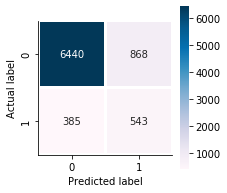

In [9]:
model_to_gs = SVC()
params = {
    "C": [0.1, 1],
    "gamma": [0.001, 0.01],
         }
gscv = GridSearchCV(param_grid = params, estimator = model_to_gs, n_jobs = 4)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_SVM_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_SVM_wgs)))

##### KNeighbors Classifier (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.91      0.92      0.92      7308
           1       0.32      0.30      0.31       928

    accuracy                           0.85      8236
   macro avg       0.62      0.61      0.61      8236
weighted avg       0.85      0.85      0.85      8236

Confusion Matrix:
AUC: 0.22
MAE: 0.15
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=2, p=2,
                     weights='distance')


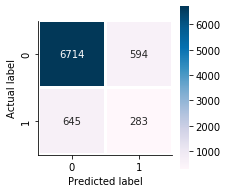

In [10]:
model_to_gs = KNeighborsClassifier()
params = {
    "weights": ["uniform", "distance"],
    "n_neighbors": [2, 4],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, n_jobs=4)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_KNC_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_KNC_wgs)))

##### XGB Classifier (with grid search):

Classification Report X_test:
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7308
           1       0.36      0.62      0.46       928

    accuracy                           0.83      8236
   macro avg       0.65      0.74      0.68      8236
weighted avg       0.88      0.83      0.85      8236

Confusion Matrix:
AUC: 0.49
MAE: 0.17
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.3, max_delta_step=0, max_depth=3,
              min_child_weight=15, missing=None, n_estimator=1,
              n_estimators=100, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)


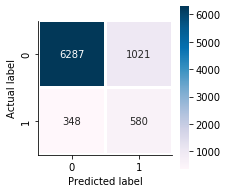

In [11]:
model_to_gs = XGBClassifier()
params = {
    "n_estimator": [1, 5, 10],
    "learning_rate": [0.1, 0.2, 0.3],
    "min_child_weight": [5, 10, 15],
}
gscv = GridSearchCV(param_grid=params, estimator=model_to_gs, cv=3, n_jobs=4)
gscv.fit(X_train, y_train)
best_model = gscv.best_estimator_
model_XGB_wgs = functions.vis_results(best_model, X_train, X_test, y_train, y_test)
results_wgs.update(dict(functions.model_result(model_XGB_wgs)))

### Results:

In [12]:
results_wgs = pd.DataFrame(data=results_wgs).T
results_wgs.reset_index(inplace=True)
results_wgs.columns = ['Model', 'ACC', 'AUC', 'PRECISION_ALL', 'RECALL_ALL', 'F1_ALL', 'PRECISION_1', 'RECALL_1', 'F1_1', 'MAE']
results_wgs

,Model,ACC,AUC,PRECISION_ALL,RECALL_ALL,F1_ALL,PRECISION_1,RECALL_1,F1_1,MAE
0,LogisticRegression,0.831107,0.469109,0.878940,0.831107,0.849394,0.354859,0.609914,0.448672,0.168893
1,DecisionTreeClassifier,0.805610,0.345358,0.858072,0.805610,0.826825,0.290081,0.501078,0.367444,0.194390
2,RandomForestClassifier,0.845192,0.480278,0.882231,0.845192,0.859687,0.381892,0.604526,0.468085,0.154808
3,SVC,0.847863,0.466355,0.880631,0.847863,0.860971,0.384833,0.585129,0.464301,0.152137
4,KNeighborsClassifier,0.849563,0.223676,0.845912,0.849563,0.847699,0.322691,0.304957,0.313573,0.150437
5,XGBClassifier,0.833779,0.485290,0.881604,0.833779,0.851884,0.362274,0.625000,0.458679,0.166221


### Save results:

In [13]:
results_wgs.to_csv(r'./results/results_wgs.csv', sep=';', index=False)

### Save models:

In [14]:
with open(f'./models/model_LR_wgs.pickle', 'wb') as f:
    pickle.dump(model_LR_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_DTC_wgs.pickle', 'wb') as f:
    pickle.dump(model_DTC_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_RFC_wgs.pickle', 'wb') as f:
    pickle.dump(model_RFC_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_SVM_wgs.pickle', 'wb') as f:
    pickle.dump(model_SVM_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_KNC_wgs.pickle', 'wb') as f:
    pickle.dump(model_KNC_wgs[0], f, pickle.HIGHEST_PROTOCOL)
with open(f'./models/model_XGB_wgs.pickle', 'wb') as f:
    pickle.dump(model_XGB_wgs[0], f, pickle.HIGHEST_PROTOCOL)